# Principal Component Analysis for Financial Inclusion

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 1. Cargar los datos desde un archivo Excel
data = pd.read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data inclusion financiera.xlsx')

# Convertir la columna "Fecha" al formato de fecha
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

In [3]:
# 3. Aplicar diferencias logarítmicas multiplicadas por 400
numeric_data = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convertir columnas numéricas
numeric_data 

,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
0,10.28,7.78,12.145887,1286199,10.866629,7.716501,4.002207,24.793048,23.305185,977
1,9.72,7.75,12.297343,1322741,10.282440,7.692056,4.214256,25.378728,23.449867,1016
2,9.65,7.56,13.205494,1350085,10.040474,7.997109,4.075549,25.160441,22.116769,1021
3,8.89,7.03,14.364746,1419039,10.085371,8.631039,4.339406,25.282033,21.638237,1050
4,7.78,6.90,12.291373,1446002,10.319630,8.710091,4.414169,24.849773,21.510888,1044
...,...,...,...,...,...,...,...,...,...,...
82,3.26,3.29,5.184749,7094999,17.668821,14.486573,3.215061,87.449075,85.149114,4341
83,2.68,3.06,5.051773,7234567,18.448586,14.509252,3.448350,85.912169,85.544000,4289
84,2.53,2.92,5.207329,7391416,19.768037,14.755661,3.440674,84.037848,84.836900,4267
85,2.72,2.89,5.376469,7577771,20.494660,14.782893,3.273696,83.341674,86.705278,4256


In [4]:
scaler = StandardScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(numeric_data),  # Normalizar solo los valores
    columns=numeric_data.columns  # Mantener nombres de columnas
)
# normalized.index = log_diff_values.index

In [5]:
normalized.index = data['Fecha'].values
normalized.index.name = 'Fecha'
normalized

,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
Fecha,,,,,,,,,,
2001-03-31,4.047296,2.919650,2.917588,-1.627806,-2.452921,-2.772578,-0.677523,-1.110549,-0.980749,-1.436736
2001-06-30,3.708066,2.903122,2.990770,-1.610266,-2.627876,-2.784717,-0.597170,-1.082836,-0.974516,-1.409869
2001-09-30,3.665662,2.798449,3.429579,-1.597141,-2.700341,-2.633235,-0.649731,-1.093165,-1.031947,-1.406424
2001-12-31,3.205279,2.506465,3.989716,-1.564044,-2.686895,-2.318442,-0.549746,-1.087411,-1.052562,-1.386445
2002-03-31,2.532876,2.434846,2.987885,-1.551102,-2.616738,-2.279187,-0.521416,-1.107865,-1.058048,-1.390579
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,-0.205195,0.446050,-0.445958,1.160362,-0.415771,0.589268,-0.975800,1.854216,1.683519,0.880774
2021-12-31,-0.556541,0.319340,-0.510210,1.227353,-0.182243,0.600530,-0.887399,1.781492,1.700531,0.844950
2022-03-31,-0.647406,0.242212,-0.435047,1.302639,0.212912,0.722890,-0.890308,1.692803,1.670068,0.829794


<Figure size 200x100 with 0 Axes>

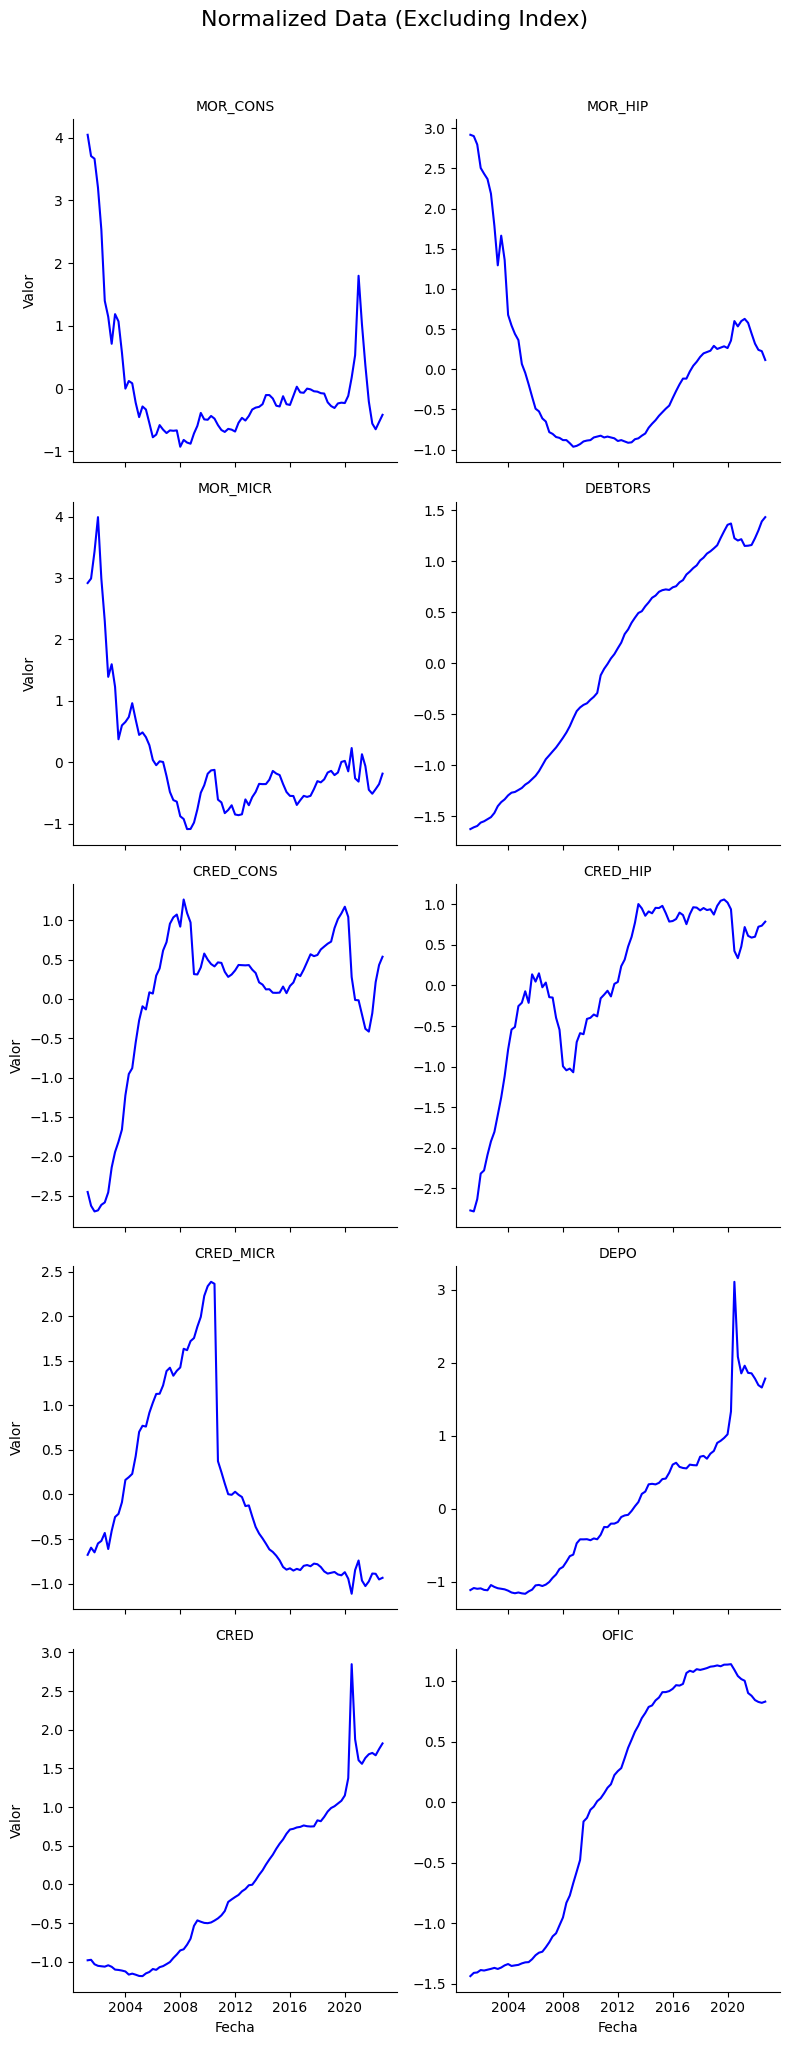

In [44]:
# Transforma el DataFrame a formato largo
normalized_long = normalized.reset_index().melt(id_vars='Fecha', var_name='Variable', value_name='Valor')

# Crear la figura con el gráfico
plt.figure(figsize=(2,1))
g1 = sns.FacetGrid(normalized_long, col='Variable', col_wrap=2, sharey=False, sharex=True, height=4)
g1.map(sns.lineplot, 'Fecha', 'Valor', color='blue')
g1.set_titles("{col_name}")
g1.set_axis_labels("Fecha", "Valor")
g1.fig.suptitle("Normalized Data (Excluding Index)", fontsize=16, y=1.02)
g1.tight_layout()

# Mostrar el gráfico
plt.show()

In [7]:
from sklearn.decomposition import PCA

In [9]:
# Renombrar log_diff_normalized a data_pca
data_pca = normalized.iloc[:, :]  # Usar 'normalized' como la data a analizar

# Estimar el PCA
pca = PCA()
principal_components = pca.fit_transform(data_pca)

# Convertir componentes principales a DataFrame
pca_data = pd.DataFrame(
    principal_components,
    columns=[f"PC{i+1}" for i in range(principal_components.shape[1])],
    index=data_pca.index
)

In [54]:
# 1. Imprimir la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
print("Varianza explicada por cada componente principal (%):")
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.2f}%")

# 2. Imprimir la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada (%):")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {cum_var:.2f}%")

# 3. Mostrar los coeficientes de cada variable en los componentes principales
coefficients = pd.DataFrame(
    pca.components_,
    columns=data_pca.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\nCoeficientes de las variables en los componentes principales:")
coefficients

Varianza explicada por cada componente principal (%):
PC1: 31.93%
PC2: 15.19%
PC3: 13.01%
PC4: 11.16%
PC5: 9.90%
PC6: 6.63%
PC7: 4.94%
PC8: 4.59%
PC9: 2.06%
PC10: 0.59%

Varianza explicada acumulada (%):
PC1: 31.93%
PC2: 47.12%
PC3: 60.12%
PC4: 71.28%
PC5: 81.18%
PC6: 87.82%
PC7: 92.76%
PC8: 97.35%
PC9: 99.41%
PC10: 100.00%

Coeficientes de las variables en los componentes principales:


,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
PC1,0.167289,0.347406,0.199584,-0.309518,-0.413678,-0.292123,-0.256741,0.438481,0.447759,0.023516
PC2,-0.313892,-0.369553,-0.155779,0.498515,0.127985,0.039369,-0.273574,0.391681,0.406631,0.283869
PC3,0.446189,-0.010498,0.472851,0.194214,0.020081,0.119429,0.292462,0.005447,-0.011047,0.662680
PC4,-0.325731,-0.399407,0.069468,-0.309700,-0.008218,-0.509972,0.588753,0.052501,0.127778,0.088206
PC5,-0.332250,-0.091967,0.654781,-0.208432,0.174127,0.506510,0.012619,0.170583,0.106060,-0.285642
PC6,0.625565,-0.274223,-0.019159,0.137280,0.323432,-0.092148,0.170464,0.245541,0.205729,-0.519119
PC7,-0.064651,0.259340,0.177468,-0.128743,0.762397,-0.419948,-0.309461,-0.060150,-0.041069,0.147705
PC8,0.058583,-0.440722,0.441234,0.194888,-0.296514,-0.357359,-0.440508,-0.327797,-0.172649,-0.150767
PC9,-0.229471,0.483839,0.216249,0.615386,-0.066273,-0.215353,0.325626,-0.150949,0.186376,-0.271028
PC10,0.079436,-0.062084,-0.073714,-0.162796,0.059407,0.152635,-0.044863,-0.654439,0.705628,0.053474


In [11]:
# 1. Imprimir la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
print("Varianza explicada por cada componente principal (%):")
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.2f}%")

# 2. Imprimir la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada (%):")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {cum_var:.2f}%")

# 3. Mostrar los coeficientes de cada variable en los componentes principales
coefficients = pd.DataFrame(
    pca.components_,
    columns=data_pca.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\nCoeficientes de las variables en los componentes principales:")
coefficients

Varianza explicada por cada componente principal (%):
PC1: 59.97%
PC2: 31.60%
PC3: 3.40%
PC4: 1.77%
PC5: 1.37%
PC6: 0.94%
PC7: 0.51%
PC8: 0.38%
PC9: 0.04%
PC10: 0.02%

Varianza explicada acumulada (%):
PC1: 59.97%
PC2: 91.57%
PC3: 94.97%
PC4: 96.74%
PC5: 98.11%
PC6: 99.04%
PC7: 99.55%
PC8: 99.94%
PC9: 99.98%
PC10: 100.00%

Coeficientes de las variables en los componentes principales:


,MOR_CONS,MOR_HIP,MOR_MICR,DEBTORS,CRED_CONS,CRED_HIP,CRED_MICR,DEPO,CRED,OFIC
PC1,-0.255413,-0.247695,-0.325729,0.381839,0.325855,0.380601,-0.122758,0.330138,0.332182,0.368872
PC2,-0.398773,-0.426120,-0.298143,-0.189342,0.290659,0.002737,0.486587,-0.288275,-0.302817,-0.196481
PC3,0.237583,0.073333,-0.005605,0.079073,0.179762,-0.479469,0.631171,0.408526,0.322707,0.016676
PC4,0.612135,-0.295389,0.262944,0.140982,0.282486,0.161144,0.135365,-0.308609,-0.227330,0.421915
PC5,-0.186913,0.289025,0.599691,-0.046971,0.461941,0.422667,0.151010,0.067850,0.098816,-0.300803
PC6,0.127129,0.351672,-0.326698,0.040980,0.660870,-0.340836,-0.376837,-0.187381,-0.083226,-0.121620
PC7,-0.523513,0.253947,0.292794,0.251279,-0.024950,-0.348820,0.090240,-0.288728,-0.072129,0.541819
PC8,0.126673,0.618156,-0.427486,0.034814,-0.155429,0.426656,0.391596,-0.169512,-0.088148,0.147767
PC9,0.039663,-0.051696,0.013949,0.846863,-0.142629,-0.026473,0.068516,-0.153879,-0.099622,-0.468018
PC10,0.042491,-0.089158,-0.028496,-0.082490,-0.044284,0.007008,0.021620,-0.608507,0.776241,-0.085559


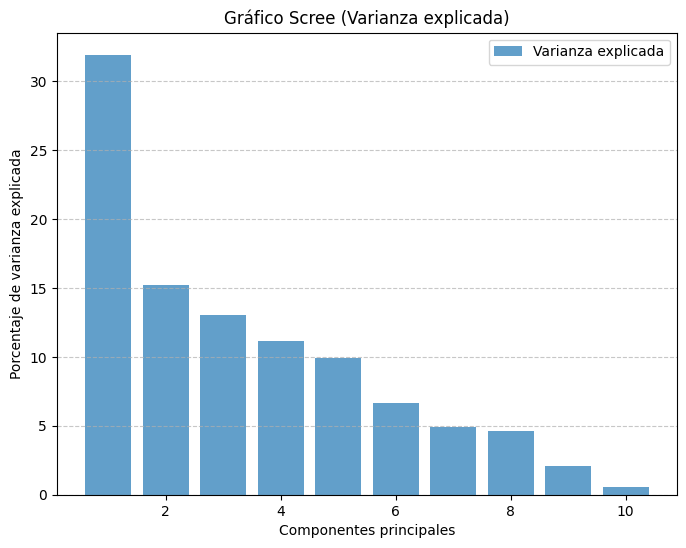

In [56]:
# 4. Gráficos para analizar los resultados
# a) Scree Plot (gráfico de varianza explicada)
plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(explained_variance_ratio) + 1), 
    explained_variance_ratio, 
    alpha=0.7, 
    label='Varianza explicada'
)
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Gráfico Scree (Varianza explicada)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

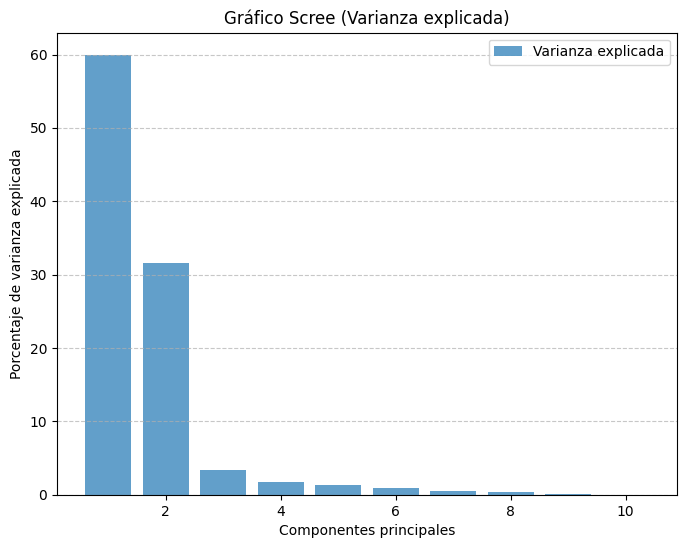

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(explained_variance_ratio) + 1), 
    explained_variance_ratio, 
    alpha=0.7, 
    label='Varianza explicada'
)
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Gráfico Scree (Varianza explicada)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
print(principal_components)

[[-6.32258366e+00 -3.57052315e+00  6.97254953e-01  8.80820852e-01
  -2.33911348e-01  5.65113391e-01 -3.52028800e-01  8.99233646e-03
  -1.03885394e-02  7.47512970e-02]
 [-6.29934985e+00 -3.48028676e+00  6.55291744e-01  6.60628491e-01
  -2.11620293e-01  3.42240627e-01 -1.30843306e-01 -2.26660188e-02
   6.20602419e-03  5.33540695e-02]
 [-6.38123695e+00 -3.57861851e+00  4.94591676e-01  7.97345389e-01
   4.37880509e-02  8.38017830e-02 -5.02314962e-02 -2.17236469e-01
   3.55941795e-02  1.18428074e-02]
 [-6.24680206e+00 -3.38979754e+00  2.73899360e-01  8.33128068e-01
   5.26510329e-01 -3.96925744e-01  1.98489495e-01 -5.19178658e-01
   5.66879739e-02 -1.78186423e-02]
 [-5.70183054e+00 -2.75225107e+00  1.17010993e-01  2.16875439e-01
   8.26859812e-02 -1.52665566e-01  2.33410696e-01 -1.99628975e-01
   2.72299099e-02 -6.20195659e-03]
 [-5.09265175e+00 -2.01603802e+00 -1.84967419e-01 -5.78271099e-01
  -3.35238141e-02 -1.71842864e-01  5.58895684e-01  2.57191698e-02
  -1.20580252e-02 -2.98416824e-02

Varianza explicada por cada componente principal (%):
PC1: 59.97%
PC2: 31.60%
PC3: 3.40%
PC4: 1.77%
PC5: 1.37%
PC6: 0.94%
PC7: 0.51%
PC8: 0.38%
PC9: 0.04%
PC10: 0.02%

Varianza explicada acumulada (%):
PC1: 59.97%
PC2: 91.57%
PC3: 94.97%
PC4: 96.74%
PC5: 98.11%
PC6: 99.04%
PC7: 99.55%
PC8: 99.94%
PC9: 99.98%
PC10: 100.00%

Coeficientes de las variables en los componentes principales:


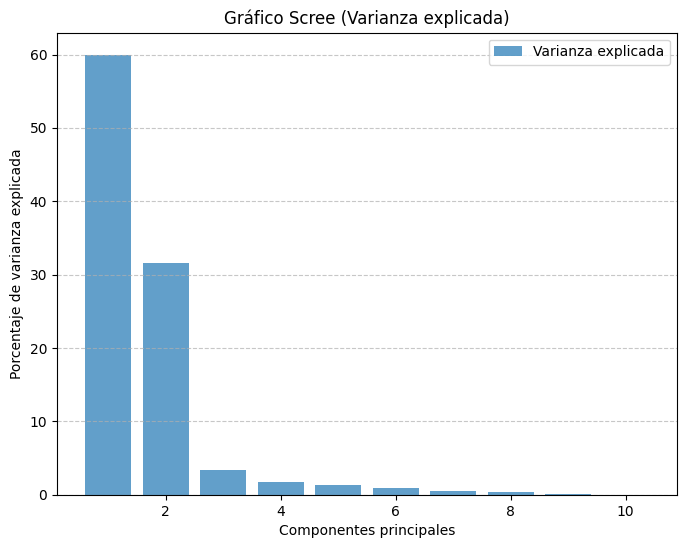

In [47]:
pca = PCA()  # Usamos solo los dos primeros componentes principales
principal_components = pca.fit_transform(normalized)

# Convertir componentes principales a DataFrame
pca_data = pd.DataFrame(
    principal_components,
    columns=[f"PC{i+1}" for i in range(principal_components.shape[1])],
    index=normalized.index
)

# 1. Imprimir la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_ * 100  # Convertir a porcentaje
print("Varianza explicada por cada componente principal (%):")
for i, var in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {var:.2f}%")

# 2. Imprimir la varianza explicada acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza explicada acumulada (%):")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {cum_var:.2f}%")

# 3. Mostrar los coeficientes de cada variable en los componentes principales
coefficients = pd.DataFrame(
    pca.components_,
    columns=normalized.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\nCoeficientes de las variables en los componentes principales:")
coefficients

plt.figure(figsize=(8, 6))
plt.bar(
    range(1, len(explained_variance_ratio) + 1), 
    explained_variance_ratio, 
    alpha=0.7, 
    label='Varianza explicada'
)
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Gráfico Scree (Varianza explicada)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
coefficients = pca.components_[:2]
coefficients

array([[-0.25541339, -0.24769451, -0.32572928,  0.38183853,  0.32585495,
         0.38060147, -0.1227581 ,  0.33013809,  0.33218192,  0.36887225],
       [-0.39877299, -0.42611965, -0.29814281, -0.18934182,  0.29065897,
         0.00273739,  0.4865872 , -0.28827543, -0.30281683, -0.19648079]])

In [50]:
# Obtener la varianza explicada de los dos primeros componentes
explained_variance_ratio = pca.explained_variance_ratio_[:2]
explained_variance_ratio

array([0.59971484, 0.31601113])

In [51]:
# Paso 1: Calcular el peso de cada componente en función de la varianza explicada
# Primero, multiplicamos cada componente por su varianza explicada
weighted_coefficients = coefficients.T * explained_variance_ratio

# Paso 2: Calcular la suma total de varianza explicada de los dos componentes
total_explained_variance = np.sum(explained_variance_ratio)

# Paso 3: Calcular los pesos relativos de cada variable
# Cada peso es la proporción de la varianza explicada por cada componente
weights = np.sum(weighted_coefficients, axis=1) / total_explained_variance
weights

array([-0.30488586, -0.30926787, -0.31620937,  0.18472787,  0.31370904,
        0.25020301,  0.08752303,  0.11672757,  0.11304795,  0.17377256])

In [52]:
# Paso 4: Construir el índice ponderado
# Multiplicamos cada variable en 'normalized' por su coeficiente ponderado y sumamos
index_ponderado = np.dot(normalized, weights)

# Paso 3: Convertir el índice a un DataFrame
index_df = pd.DataFrame(index_ponderado, columns=["Inclusión financiera"], index=normalized.index)
index_df

,Inclusión financiera
Fecha,
2001-03-31,-5.372865
2001-06-30,-5.326509
2001-09-30,-5.414071
2001-12-31,-5.260868
2002-03-31,-4.683950
...,...
2021-09-30,0.771391
2021-12-31,1.021414
2022-03-31,1.201006


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Realizamos el ajuste y la transformación para la columna de interés
index_df['Inclusión financiera'] = scaler.fit_transform(index_df[['Inclusión financiera']])

# Verificar el resultado
print(index_df.head())

            Inclusión financiera
Fecha                           
2001-03-31              0.006178
2001-06-30              0.013128
2001-09-30              0.000000
2001-12-31              0.022970
2002-03-31              0.109466


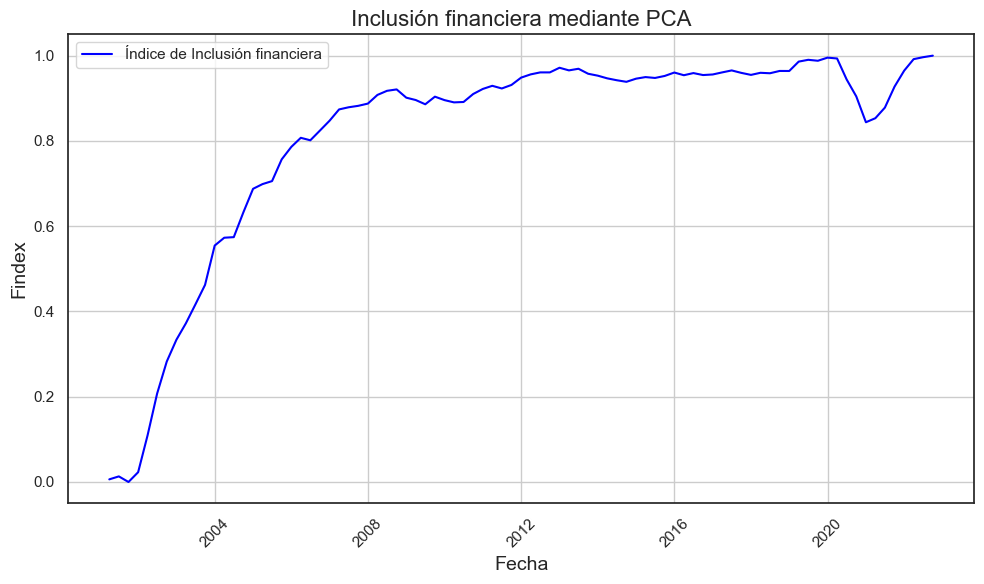

In [66]:
# Graficar el índice
plt.figure(figsize=(10, 6))
plt.plot(index_df.index, index_df['Inclusión financiera'], color='blue', label='Índice de Inclusión financiera')

# Añadir título y etiquetas
plt.title('Inclusión financiera mediante PCA', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Findex', fontsize=14)

# Mejorar el formato de las fechas en el eje x
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Comparison with the data

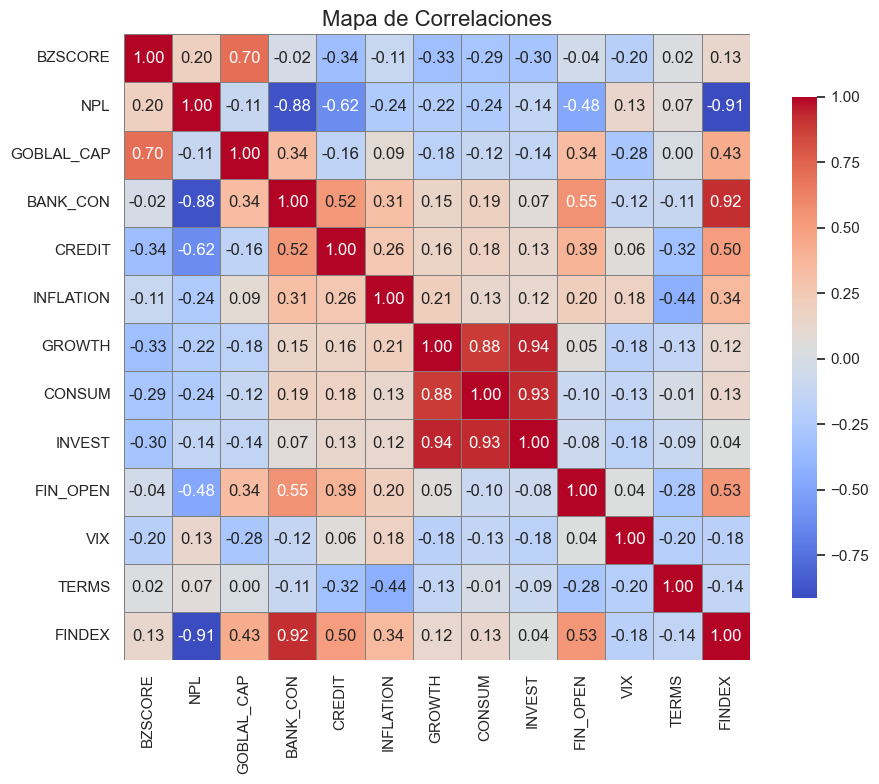

In [67]:
# Cargar la nueva data desde el archivo Excel
new_data = pd.read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final 1.xlsx')

# Convertir la columna "Fecha" al formato de fecha
new_data['Fecha'] = pd.to_datetime(new_data['Fecha'], format='%d/%m/%y')

# Establecer la columna 'Fecha' como índice
new_data.set_index('Fecha', inplace=True)

# Asegurarse de que 'index_df' tenga el mismo índice de fechas que 'new_data'
# Añadir 'index_df' a la data como una columna
new_data['Inclusión financiera'] = index_df['Inclusión financiera']
# Cambiar el nombre de la columna
new_data.rename(columns={'Inclusión financiera': 'FINDEX'}, inplace=True)

correlation_matrix = new_data.corr()

# Establecer el tamaño y estilo de la figura
plt.figure(figsize=(10, 8))
sns.set(style="white", palette="muted")

# Crear el mapa de calor con mejoras visuales
sns.heatmap(
    correlation_matrix,
    annot=True,               # Mostrar los valores de correlación
    cmap="coolwarm",          # Paleta de colores
    fmt=".2f",                # Formato de los números
    linewidths=0.5,           # Líneas que separan las celdas
    linecolor='gray',         # Color de las líneas
    square=True,              # Forma cuadrada para el mapa
    cbar_kws={'shrink': 0.8}  # Reducir tamaño de la barra de color
)

# Añadir título y etiquetas
plt.title("Mapa de Correlaciones", fontsize=16)
plt.tight_layout()  # Ajustar el layout para mejor visibilidad
plt.show()

In [68]:
# Guardar los datos en un archivo Excel
new_data.to_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final findex.xlsx', index=True)